**From uper Menu choose:**
---
Runtime --> Change runtime type:
---
change Hardare accelerator to (gpu)

In [1]:
%tensorflow_version 1.15
import tensorflow as tf
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.15`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


Using TensorFlow backend.


In [2]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print(train_images.shape[1:])

(28, 28)


#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature

In [5]:
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

784


#convert data to float and scale values between 0 and 1

In [0]:
train_data = train_data.astype('float')
test_data = test_data.astype('float')

#scale data

In [0]:
train_data /=255.0
test_data /=255.0

#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()

In [0]:
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network

In [0]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile model

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.2786 - acc: 0.9135 - val_loss: 0.1372 - val_acc: 0.9566
Epoch 2/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.0926 - acc: 0.9718 - val_loss: 0.0852 - val_acc: 0.9733
Epoch 3/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.0588 - acc: 0.9817 - val_loss: 0.0776 - val_acc: 0.9748
Epoch 4/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.0398 - acc: 0.9874 - val_loss: 0.0730 - val_acc: 0.9785
Epoch 5/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.0294 - acc: 0.9904 - val_loss: 0.0681 - val_acc: 0.9804
Epoch 6/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.0219 - acc: 0.9930 - val_loss: 0.0827 - val_acc: 0.9780
Epoch 7/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.0176 - acc: 0.9942 - val_loss: 0.1415 - val_acc

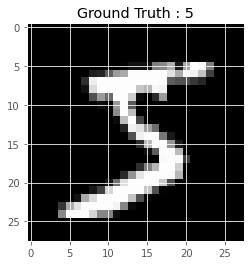

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 23us/step - loss: 0.2715 - acc: 0.9176 - val_loss: 0.1543 - val_acc: 0.9527
Epoch 2/5
60000/60000 [==============================] - 1s 18us/step - loss: 0.0933 - acc: 0.9704 - val_loss: 0.0775 - val_acc: 0.9766
Epoch 3/5
60000/60000 [==============================] - 1s 16us/step - loss: 0.0577 - acc: 0.9815 - val_loss: 0.0766 - val_acc: 0.9753
Epoch 4/5
60000/60000 [==============================] - 1s 17us/step - loss: 0.0410 - acc: 0.9867 - val_loss: 0.0647 - val_acc: 0.9798
Epoch 5/5
60000/60000 [==============================] - 1s 18us/step - loss: 0.0291 - acc: 0.9901 - val_loss: 0.0767 - val_acc: 0.9768
[7]


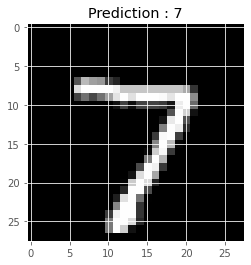

10000/10000 [==============================] - 0s 42us/step
Evaluation result on Test Data : Loss = 0.07666618559749913, accuracy = 0.9768


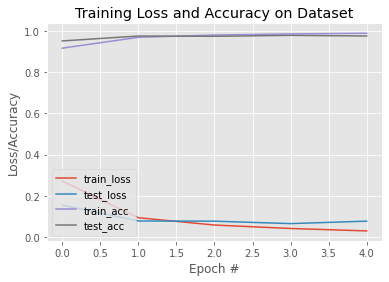

In [23]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()
#display the first image in the training data
plt.imshow(train_images[0,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(train_labels[0]))
plt.show()

#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=5, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

print(model.predict_classes(test_data[[0],:]))
plt.imshow(test_images[0,:,:],cmap='gray')
plt.title('Prediction : '+str((model.predict_classes(test_data[[0],:]))[0]))
plt.show()

[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

N = 5
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="test_loss")
plt.plot(np.arange(0, N), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_acc"], label="test_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

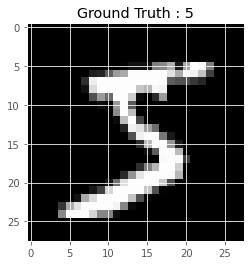

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 29us/step - loss: 0.3903 - acc: 0.8790 - val_loss: 0.2280 - val_acc: 0.9323
Epoch 2/5
60000/60000 [==============================] - 1s 17us/step - loss: 0.1496 - acc: 0.9536 - val_loss: 0.1371 - val_acc: 0.9557
Epoch 3/5
60000/60000 [==============================] - 1s 18us/step - loss: 0.0965 - acc: 0.9697 - val_loss: 0.1332 - val_acc: 0.9558
Epoch 4/5
60000/60000 [==============================] - 1s 19us/step - loss: 0.0659 - acc: 0.9788 - val_loss: 0.0941 - val_acc: 0.9702
Epoch 5/5
60000/60000 [==============================] - 1s 20us/step - loss: 0.0482 - acc: 0.9848 - val_loss: 0.1442 - val_acc: 0.9537
[7]


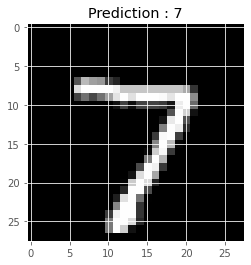

10000/10000 [==============================] - 0s 38us/step
Evaluation result on Test Data : Loss = 0.14421901630815118, accuracy = 0.9537


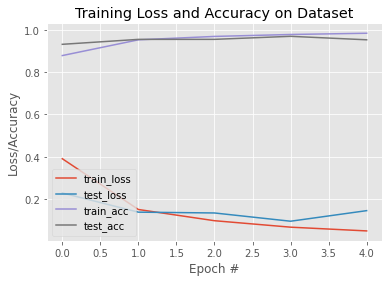

In [24]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()
#display the first image in the training data
plt.imshow(train_images[0,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(train_labels[0]))
plt.show()

#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(dimData,)))
model.add(Dense(512, activation='tanh'))
model.add(Dense(512, activation='tanh'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=5, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

print(model.predict_classes(test_data[[0],:]))
plt.imshow(test_images[0,:,:],cmap='gray')
plt.title('Prediction : '+str((model.predict_classes(test_data[[0],:]))[0]))
plt.show()

[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

N = 5
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="test_loss")
plt.plot(np.arange(0, N), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_acc"], label="test_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

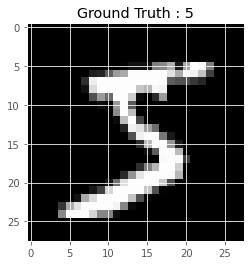

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 24us/step - loss: 14.5170 - acc: 0.0993 - val_loss: 14.4918 - val_acc: 0.1009
Epoch 2/5
60000/60000 [==============================] - 1s 16us/step - loss: 14.5200 - acc: 0.0992 - val_loss: 14.4918 - val_acc: 0.1009
Epoch 3/5
60000/60000 [==============================] - 1s 17us/step - loss: 14.5200 - acc: 0.0992 - val_loss: 14.4918 - val_acc: 0.1009
Epoch 4/5
60000/60000 [==============================] - 1s 16us/step - loss: 14.5200 - acc: 0.0992 - val_loss: 14.4918 - val_acc: 0.1009
Epoch 5/5
60000/60000 [==============================] - 1s 17us/step - loss: 14.5200 - acc: 0.0992 - val_loss: 14.4918 - val_acc: 0.1009
[9]


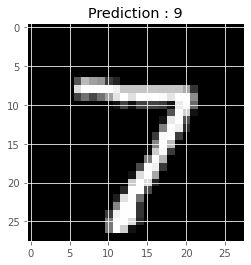

10000/10000 [==============================] - 0s 36us/step
Evaluation result on Test Data : Loss = 14.49177936706543, accuracy = 0.1009


In [25]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()
#display the first image in the training data
plt.imshow(train_images[0,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(train_labels[0]))
plt.show()

#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#change the labels frominteger to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=5, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

print(model.predict_classes(test_data[[0],:]))
plt.imshow(test_images[0,:,:],cmap='gray')
plt.title('Prediction : '+str((model.predict_classes(test_data[[0],:]))[0]))
plt.show()

[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))